# Full example

In [1]:
push!(LOAD_PATH,"C:/JMB/DINEOF.jl/src","."); using DINEOF
using PyPlot
using LinearAlgebra
using Arpack
using Statistics
using Optim
using NCDatasets
using FTPClient

┌ Info: Recompiling stale cache file C:\Users\jmbeckers\.julia\compiled\v1.2\DINEOF.ji for DINEOF [top-level]
└ @ Base loading.jl:1240


## Get a nice data cube and look at it

In [2]:
fname="c:/Users/JMBECKERS/Downloads/SPMCT.nc"


"c:/Users/JMBECKERS/Downloads/SPMCT.nc"

In [3]:
ds=Dataset(fname)

Dataset: c:\Users\JMBECKERS\Downloads\SPMCT.nc
Group: /

Dimensions
   time = 366
   lat = 124
   lon = 115

Variables
  time   (366)
    Datatype:    Float64
    Dimensions:  time
    Attributes:
     units                = seconds since 1970-1-1
     calendar             = gregorian
     standard_name        = time

  coverage   (366)
    Datatype:    Float64
    Dimensions:  time
    Attributes:
     long_name            = Percentage of valid pixels
     valid_min            = 0.0
     valid_max            = 100.0

  lat   (124)
    Datatype:    Float64
    Dimensions:  lat
    Attributes:
     units                = degrees north
     standard_name        = latitude

  lon   (115)
    Datatype:    Float64
    Dimensions:  lon
    Attributes:
     units                = degrees east
     standard_name        = longitude

  spm   (115 × 124 × 366)
    Datatype:    Float64
    Dimensions:  lon × lat × time
    Attributes:
     _FillValue           = -999.0
     units                = 

In [4]:
spm=ds["spm"][:]
spm[ismissing.(spm)].=NaN

3495799-element view(reshape(::Array{Union{Missing, Float64},3}, 5219160), [1, 57, 58, 59, 60, 61, 62, 63, 75, 116  …  5219151, 5219152, 5219153, 5219154, 5219155, 5219156, 5219157, 5219158, 5219159, 5219160]) with eltype Union{Missing, Float64}:
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   ⋮
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

In [5]:
meanspm=mean(spm[.!isnan.(spm)])

4.483804048101992

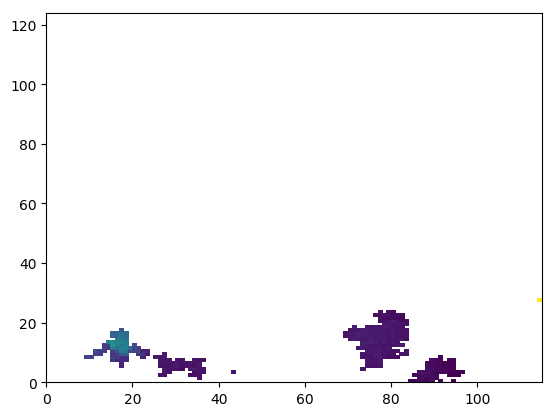

PyObject <matplotlib.collections.PolyCollection object at 0x0000000035D336D8>

In [6]:
pcolor(spm[:,:,10]')

## Make a first analysis with only a limited number of EOFs

Raw data variance and mean: 44.369489491157815 and 4.483804048101992
Number of missing points (including possible masks): 3495799 out of 5219160
Number of data points before elimination of low coverage regions is 1723361 and cv fraction 0.010181267882933408
Number of data points after elimination of low coverage regions is 1654061 and cv fraction 0.010188257869570711
svds! matrix size: (11612, 257)
svds!: variance and mean of the entry matrix: 42.94310950347494 , -0.03672721743854933 ; intial variance at points to fill in: 42.932682092962196 
Eof loop 1 with mean squared misfit: 15.308264462622102 
Eof loop 2 with mean squared misfit: 7.677764706045304 
Eof loop 3 with mean squared misfit: 5.4739247813781695 
Eof loop 4 with mean squared misfit: 4.848285936426104 
Eof loop 5 with mean squared misfit: 4.2707890895262715 
Eof loop 6 with mean squared misfit: 3.907321315896941 
Eof loop 7 with mean squared misfit: 3.7250071814906844 
Eof loop 8 with mean squared misfit: 3.6265746617379797

┌ Warning: Initial Variance has been increased for filtered matrix  by factor 1.2037442376740373
└ @ DINEOF C:\JMB\DINEOF.jl\src\DINEOF_svds!.jl:295


musquare optimization: Both OI-EOF error and CV coherence
tutu = Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [1.221854, 244.370833]
 * Minimizer: 2.415871e+02
 * Minimum: 4.249890e+02
 * Iterations: 8
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.0e-02*|x|+1.0e-07): true
 * Objective Function Calls: 9
CV estimator from EOF 3.3763013782736313 is now 2.9213122409192764 if OI is used
Optimal musquare is 241.587057762694
Relative error on reconstruction 3.986016122850105e-5, relative error on CV estimator 0.01816015890348788
The two criteria to compare OI and EOF are: reconstruction 118.95404139163603, closest CV 306.03499784157776
Estimated musquare 2.4437083320912087 was inflated by factor 98.86083972875575 into 241.587057762694
This optimal value provides OI interpolation CV estimator 2.9213122409192764
Mean error variance of reconstruction: 2.182044297219755 
505.922136 seconds (3.31 G allocations: 226.904 GiB, 8.57% gc time)


Excessive output truncated after 10488272 bytes.

(S, sum(S), offset) = 

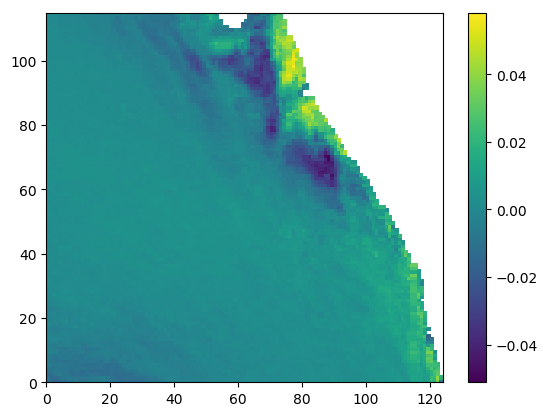

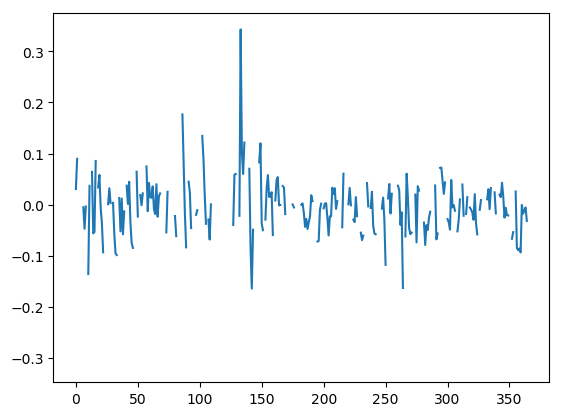

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000036170898>

In [7]:
@time XA,offset,U,S,V,cvEOF,cvarray,errmap,musquare=DINEOFrun(spm,[1,1,2];eofmax=10)
@show S,sum(S),offset

pcolor(U[4][1]),colorbar()
figure()
plot(V[4][1])

In [ ]:
@time XA,offset,U,S,V,cvEOF,cvarray,errmap,musquare=DINEOFrun(spm,[1,2,1];eofmax=10)
@show S,sum(S),offset

pcolor(U[4][1]),colorbar()
figure()
plot(V[4][1])

Raw data variance and mean: 44.369489491157815 and 4.483804048101992
Number of missing points (including possible masks): 3495799 out of 5219160
Number of data points before elimination of low coverage regions is 1723361 and cv fraction 0.010198675727256216
Number of data points after elimination of low coverage regions is 1675117 and cv fraction 0.010137799329837856
svds! matrix size: (25925, 116)
svds!: variance and mean of the entry matrix: 43.13202273502786 , -0.04550253715270354 ; intial variance at points to fill in: 43.148212162199144 
Eof loop 1 with mean squared misfit: 14.95013841143519 
Eof loop 2 with mean squared misfit: 7.328049490643699 


In [ ]:
@time XA,U,S,V,cvEOF,cvarray,errmap,musquare=DINEOFrun(spm,[2,1,1];eofmax=10)
@show S,sum(S),offset

pcolor(U[4][1]),colorbar()
figure()
plot(V[4][1])

## Decide which directions to collapse and make a full analysis

In this example the classical space time decomposition seems to work. So lets try and add a time filter onto it with cross-validation by clouds.



In [ ]:
@time XA,offset,U,S,V,cvEOF,cvarray,errmap,musquare=DINEOFrun(spm,[1,1,2];minimumcoverage=[0.05,0.01],filter="vpmf",filterrepetitions=3,cvmethod="CopyMask")
@show S,sum(S),offset

pcolor(U[4][1]),colorbar()
figure()
plot(V[4][1])

## Apply QC and take out suspect points (put NaN)

In [ ]:
OO=DINEOF_pmQC(spm,XA,errmap,musquare,4)
@show mean(OO[.!isnan.(OO)])
pcolor(OO[:,:,1]),colorbar()
figure()
pcolor(spm[:,:,1]),colorbar()

In [ ]:
sum(OO.>5)/sum(.!isnan.(spm))*100

## Redo the decomposition but by restarting

With a time filter you can accept possibly empty images (so coverage for fixed time can be zero). But allow for more iterations for the final reconstruction.

In [ ]:
sum(isnan.(XA))

In [ ]:
prod(size(XA))

In [ ]:
spmf=deepcopy(spm)
spmf[OO.>5].=NaN
@show sum(isnan.(spmf)),sum(isnan.(spm))
@time XA,offset,U,S,V,cvEOF,cvarray,errmap,musquare=DINEOFrun(spmf,[1,1,2];dineofmaxiter=50,restart=XA,eofstart=size(S)[1]-3,minimumcoverage=[0.05,0.00],filter="vpmf",filterrepetitions=3,cvmethod="CopyMask")
@show S,sum(S),offset

In [ ]:
pcolor(U[2][1]),colorbar()
figure()
plot(V[1][1])

## Look at error field

In [ ]:
pcolor(errmap[:,:,303]),colorbar()
figure()
pcolor(spm[:,:,303]),colorbar()



## Fuse the original data and the reconstruction to look at the effect

In [ ]:
pcolor(XA[:,:,303]),colorbar()

In [ ]:
pcolor(spm[:,:,304]),colorbar()

In [ ]:
pcolor(spmf[:,:,304]),colorbar()

In [ ]:
DINEOF_fuse!(spmf,XA,4)

In [ ]:
pcolor(spmf[:,:,304]),colorbar()